# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [56]:
def neighbours(x,y,image):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

Implement this function to get the input image and return the skeleton of the input image.

In [57]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    for inx, arr in enumerate(image):
        for iny, m in enumerate(arr):
            if(m>200):
                image[inx][iny] = 0
            else:
                image[inx][iny] = 1

    params = 5 
    #Write your code here
    Image_Thinned = image.copy()  # deepcopy to protect the original image
    changing1 = changing2 = 1        #  the points to be removed (set as 0)
    while changing1 or changing2:   #  iterates until no further changes occur in the image
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
    return Image_Thinned, params
    

Test your implementation (don't change this cell).

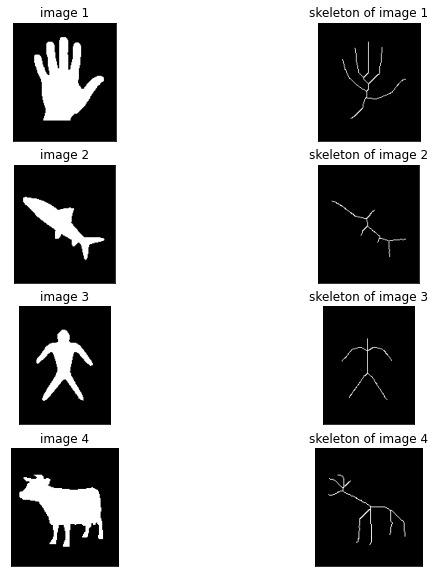

In [58]:
image_list = []

image1 = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [61]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    x,y = res.shape
    d = params
    i=1
    while(i<x-1):
        j=1
        while(j<y-1):
            if(sum(image[i-d:i+d+1, j-d:j+d+1].flatten())!=0):
                res[i][j]=1
            j+=1
        i+=1
    
    return res

Test your implementation (don't change this cell).

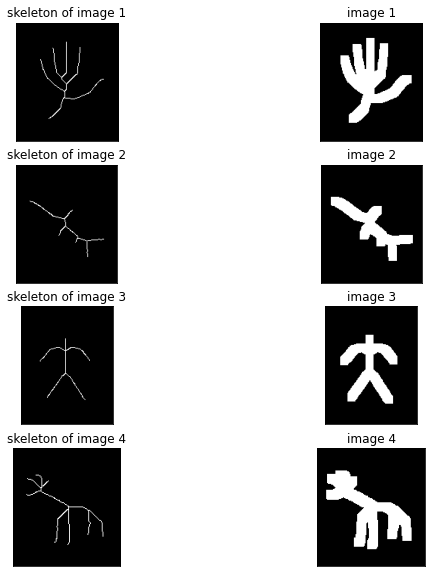

In [60]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [26]:
def get_centrolid(x, y, w, h):
    x1 = int(w / 2)
    y1 = int(h / 2)
    cx = x + x1
    cy = y + y1
    return cx, cy

Implement this function to detect shapes and number of cars in an input image.

In [62]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = 0
    
    #Write your code here
    min_contour_width = 40
    min_contour_height = 40
    offset = 10
    line_height = 550
    matches = []
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(grey, (5, 5), 0)

    ret, th = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(th, np.ones((3, 3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
    contours, h = cv2.findContours(
        closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for(i, c) in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(c)
        contour_valid = (w >= min_contour_width) and (
            h >= min_contour_height)
        if not contour_valid:
            continue
        cv2.rectangle(result, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 2)

        cv2.line(result, (0, line_height), (1200, line_height), (0, 255, 0), 2)
        centrolid = get_centrolid(x, y, w, h)
        matches.append(centrolid)
        cv2.circle(result, centrolid, 5, (0, 255, 0), -1)
        cx, cy = get_centrolid(x, y, w, h)
        for (x, y) in matches:
            cars_num = cars_num+1
            matches.remove((x, y)) 
    return result,cars_num

Test your implementation (don't change this cell).

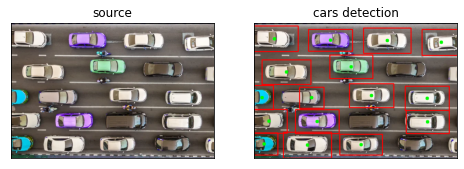

In [63]:
image_list = []
image = cv2.imread('images/img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [108]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = 0
    
    # Write your code here
    resized = imutils.resize(image, width=300)
    ratio = image.shape[0] / float(resized.shape[0])
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 85, 255, cv2.THRESH_BINARY)[1]    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    for c in cnts:
        # compute the center of the contour, then detect the name of the
        # shape using only the contour
        try:
            M = cv2.moments(c)
            cX = int((M["m10"] / M["m00"]) * ratio)
            cY = int((M["m01"] / M["m00"]) * ratio)
            
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.04 * peri, True)
            if(len(approx)>3):
                flowers_num+=1
                c = c.astype("float")
                c *= ratio
                c = c.astype("int")
                cv2.drawContours(result, [c], -1, (0, 255, 255), 2)
        except:
            pass
        
    return result,flowers_num

Test your implementation (don't change this cell).

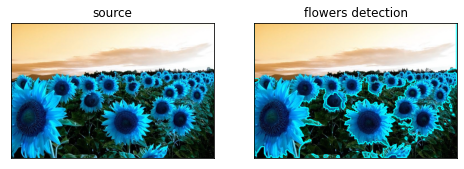

In [109]:
image_list = []
image = cv2.imread('images/img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!